# Perceptrons

In [118]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

class Data:
    
    def __init__(self, num_points = 100, min = -1, max = 1):
        self.len = num_points
        self.min = min
        self.max = max        
        self.create_model()
        self.generate()
    
    def new_point(self, classify = False):
        """Return a new data point"""
        p = (random.uniform(self.min, self.max), random.uniform(self.min, self.max))
        if classify:
            return p, self.classify_point(p)
        else:
            return p
        
    def create_model(self):
        # create two random points and use the line connecting them as the 
        # built-in classifier
        # The classifier is modeled as (w0, w1, w2)
        # such that for a given point (x,y)
        # the classification follows the sign of
        # w0*x + w1*y + w2  
        p1 = self.new_point()
        p2 = self.new_point()
        
        w0 = (p2[1] - p1[1])/(p2[0] - p1[0])  # slope (m)
        w1 = -1        
        w2 = p2[1] - w0 * p2[0] # intercept (c)
        self.model = (w0, w1, w2)
    
    def classify_point(self, point):
        dot_product = sum([i*j for i,j in zip(self.model, (point[0], point[1], 1))])
        return 1 if dot_product < 0 else -1
    
    def generate(self):
        self.points = []
        self.labels = []
        for _ in range(self.len):
            point, label = self.new_point(classify=True)
            self.points.append(point)
            self.labels.append(label)
            
    def plot(self):
        # classifier
        x = np.linspace(self.min,self.max,100)
        y = self.model[0]*x + self.model[2]
        plt.plot(x, y, color = "green")
 
        # labeled data
        cs = ["red" if label == 1 else "blue" for label in self.labels]
        plt.scatter([point[0] for point in self.points], [point[1] for point in self.points], c=cs)
        
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Generated data")
        plt.show()
            

In [212]:
class Perceptron:
    
    def __init__(self):
        self.model = np.array([0, 0, 0])  # zero initial weights
    
    def train(self, points, labels, plot = False):
        self.model = np.array([0,0,0])
        iterations = 0
        while True:
            # classify all points and populate an array of misclassified points
            misses = []
            for point, label in zip(points, labels):
                if self.classify_point(point) != label:
                    misses.append((np.array([point[0], point[1], 1]), label))

            # update weights based on a random misclassified point
            if len(misses) > 0:
                point, label = random.choice(misses)
                self.model = self.model + label * point
                iterations = iterations + 1
            else:
                if plot:
                    self.plot(points)
                return iterations
            
    
    def classify_point(self, point):
        dot_product = sum([i*j for i,j in zip(self.model, (point[0], point[1], 1))])
        return int(np.sign(dot_product))
    
    def plot(self, points):
        
        # labeled data
        cs = ["red" if self.classify_point(point) == 1 else "blue" for point in points]
        plt.scatter([point[0] for point in points], [point[1] for point in points], c=cs)

        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        
        plt.title("Learned model")
        plt.show()
                 

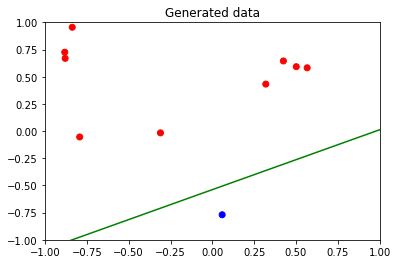

In [217]:
p = Perceptron()
d = Data(10)
d.plot()

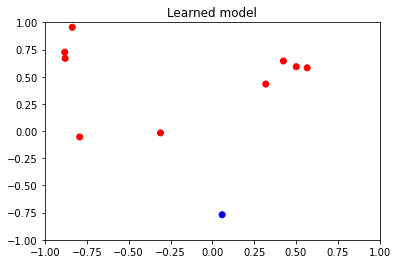

3

In [221]:
p.train(d.points, d.labels, True)

Take N=  10.   How  many  iterations  does  it  take  on  average  for  the  PLA  toconverge  forN=  10  training  points?  

In [229]:
n_iters = []

for _ in range(1000):
    # train
    d = Data(10)
    n_iters.append(p.train(d.points, d.labels))

print(f"On average, the PLA converges in {int(sum(n_iters)/len(n_iters))} iterations")

On average, the PLA converges in 10 iterations


Which of the following is closest to P[f(x) != g(x)] for N= 10?

In [232]:
n_hits = 0
n_misses = 0

for _ in range(1000):
    d = Data(10)
    i = p.train(d.points, d.labels)
    # generate a new random point and check if f and g agree
    point, actual = d.new_point(classify=True)
    predicted = p.classify_point(point)
    if actual == predicted:
        n_hits = n_hits + 1
    else:
        n_misses = n_misses + 1

p_misses = n_misses / (n_hits + n_misses)
print(f"The probability of f != g is {p_misses}")

The probability of f != g is 0.114


Now, tryN= 100.  How many iterations does it take on average for the PLAto converge forN= 100 training points? 

In [233]:
n_iters = []

for _ in range(1000):
    # train
    d = Data(100)
    n_iters.append(p.train(d.points, d.labels))

print(f"On average, the PLA converges in {int(sum(n_iters)/len(n_iters))} iterations")

On average, the PLA converges in 105 iterations


In [234]:
n_hits = 0
n_misses = 0

for _ in range(1000):
    d = Data(100)
    i = p.train(d.points, d.labels)
    # generate a new random point and check if f and g agree
    point, actual = d.new_point(classify=True)
    predicted = p.classify_point(point)
    if actual == predicted:
        n_hits = n_hits + 1
    else:
        n_misses = n_misses + 1

p_misses = n_misses / (n_hits + n_misses)
print(f"The probability of f != g is {p_misses}")

The probability of f != g is 0.017
